<a href="https://colab.research.google.com/github/OKEunsu/Data-Science/blob/main/BreadBro/OpenAI_Whisper_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenAI Whisper Example

Transcribe and translate a video.

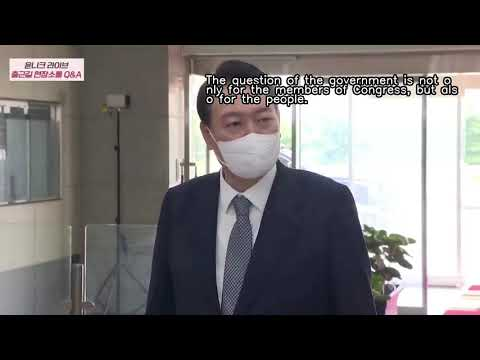

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('dO64Tja0NG0', width=1280, height=720)

## Whisper 설치

In [2]:
!pip install -qq git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.6 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:10 h

## Whisper 사용

In [5]:
pip install pytube moviepy pydub

In [9]:
from pytube import YouTube
from pydub import AudioSegment
import os

# 유튜브 영상 URL 입력
url = "https://www.youtube.com/watch?v=dO64Tja0NG0&t=25s"

# YouTube 객체 생성
yt = YouTube(url)

# 최고 화질의 영상 스트림 선택
video = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()

# 영상 다운로드
video_path = video.download(filename="video.mp4")

# MP3 파일 경로 설정
mp3_path = "audio.mp3"

# pydub을 사용하여 mp4 파일을 mp3 파일로 변환
audio = AudioSegment.from_file(video_path, "mp4")
audio.export(mp3_path, format="mp3")

# 원본 mp4 파일 삭제 (선택 사항)
os.remove(video_path)

print("음성 추출 및 MP3 변환 완료!")

음성 추출 및 MP3 변환 완료!


In [10]:
from IPython.display import Audio

Audio('/content/audio.mp3')

## Command Line Interface

### Models

- tiny.en
- tiny
- base.en
- base
- small.en
- small
- medium.en
- medium
- large-v1
- large-v2
- large

In [11]:
!whisper "audio.mp3" --language ko --model medium

100%|█████████████████████████████████████| 1.42G/1.42G [00:19<00:00, 76.5MiB/s]
[00:00.000 --> 00:08.000]  대정부 질문이라는 게 국회의원에게 답변하는 것도 있지만
[00:08.000 --> 00:13.000]  국민들에게 설명하는 것이기 때문에
[00:13.000 --> 00:19.000]  국민들께서 잘 납득하실 수 있도록
[00:19.000 --> 00:23.000]  잘 설명할 것으로 기대하고 있습니다.
[00:23.000 --> 00:25.000]  좋은 하루 보내세요.


## Python Interface

In [12]:
import whisper

model = whisper.load_model('base')

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 97.3MiB/s]


In [13]:
result = model.transcribe('audio.mp3')

result['text']

' 세모 대정부 질문이라는 게 국회의 의원에게 답변하는 것도 있지만 국민들에게 설명하는 것이기 때문에 국민들께서 잘 그 납부가 아실 수 있도록 잘 설명할 것으로 기대하고 있습니다. 드레, 자 좋은 하루 보내세요.'

In [14]:
for r in result['segments']:
    print(f'[{r["start"]} --> {r["end"]}] {r["text"]}')

[0.0 --> 8.34]  세모 대정부 질문이라는 게 국회의 의원에게 답변하는 것도 있지만
[8.34 --> 16.72]  국민들에게 설명하는 것이기 때문에 국민들께서 잘 그 납부가
[16.72 --> 22.56]  아실 수 있도록 잘 설명할 것으로 기대하고 있습니다.
[22.56 --> 25.04]  드레, 자 좋은 하루 보내세요.


## 유튜브 영상 다운로드

In [ ]:
!pip install -qq pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 3.5 MB/s eta 0:00:00


https://youtu.be/hfDagUCZvU4

In [15]:
from pytube import YouTube

yt = YouTube('https://youtu.be/hfDagUCZvU4')

yt.streams.filter(file_extension='mp4').get_by_resolution('720p').download(
    output_path='.', filename='input.mp4')

'/content/./input.mp4'

## 영상 트림(Trim) 및 오디오 파일 추출

In [16]:
!ffmpeg -y -i input.mp4 -ss 00:00:45 -to 00:01:10 -hide_banner -loglevel error cut.mp4

In [17]:
!ffmpeg -y -i cut.mp4 -q:a 0 -map a -hide_banner -loglevel error audio.mp3

In [18]:
Audio('audio.mp3')

## Transcribe

In [19]:
model = whisper.load_model('medium')

result = model.transcribe('audio.mp3')

result['text']

' 대정부 질문이라는 게 국회의원에게 답변하는 것도 있지만 국민들에게 설명하는 것이기 때문에 국민들께서 잘 납득하실 수 있도록 잘 설명할 것으로 기대하고 있습니다 좋은 하루 보내세요'

## 번역

In [20]:
result = model.transcribe('audio.mp3', task='translate')

result['text']

" I'm looking forward to explaining to the people so that the people can understand and understand well. Have a good day."

## 구간별 결과

In [21]:
for r in result['segments']:
    print(f'[{r["start"]} --> {r["end"]}] {r["text"]}')

[0.0 --> 22.0]  I'm looking forward to explaining to the people so that the people can understand and understand well.
[22.0 --> 25.0]  Have a good day.


## 얼굴 탐지 (MediaPipe)

In [25]:
import cv2
import mediapipe as mp
import math
from moviepy.editor import VideoFileClip, AudioFileClip

# MediaPipe 초기화
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

face_detection = mp_face_detection.FaceDetection(
    model_selection=0,
    min_detection_confidence=0.8)

# 비디오 파일 열기
cap = cv2.VideoCapture('cut.mp4')

# 비디오의 너비, 높이, FPS 가져오기
w, h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# 비디오 라이터 초기화
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (w, h))

frame_num = 0

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        break

    cur_sec = frame_num / fps

    result_img = img.copy()

    img.flags.writeable = False
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = face_detection.process(img)

    if results.detections:
        for detection in results.detections:
            text = ''
            # 'result' 변수를 정의해야 합니다. 예: result = {'segments': [{'start': 0, 'end': 10, 'text': 'Example text'}]}
            for r in result['segments']:
                if r['start'] < cur_sec <= r['end']:
                    text = r['text']

            x1 = int(detection.location_data.relative_bounding_box.xmin * w)
            y1 = int(detection.location_data.relative_bounding_box.ymin * h) - 50

            for i in range(math.ceil(len(text)/40)):
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 1
                font_thickness = 2
                font_coords = (x1, y1+(i*25))
                t = text[i*40:(i+1)*40].strip()

                cv2.putText(result_img, text=t, org=font_coords, fontFace=font, fontScale=font_scale, color=(0, 0, 0), thickness=font_thickness*5)
                cv2.putText(result_img, text=t, org=font_coords, fontFace=font, fontScale=font_scale, color=(255, 255, 255), thickness=font_thickness)

    out.write(result_img)

    frame_num += 1

cap.release()
out.release()

# 원본 비디오에서 오디오 트랙을 추출하고, 처리된 비디오에 추가
original_video = VideoFileClip('cut.mp4')
processed_video = VideoFileClip('output_video.mp4')

# 오디오 추출
original_audio = original_video.audio

# 오디오와 비디오 결합
final_video = processed_video.set_audio(original_audio)
final_video.write_videofile('output_with_audio.mp4', codec='libx264', audio_codec='aac')

print("음성 추출 및 비디오 처리 완료!")


Moviepy - Building video output_with_audio.mp4.
MoviePy - Writing audio in output_with_audioTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video output_with_audio.mp4



t: 100%|██████████| 751/751 [00:34<00:00, 18.37it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file output_video.mp4, 2764800 bytes wanted but 0 bytes read,at frame 750/751, at time 25.03/25.03 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready output_with_audio.mp4
음성 추출 및 비디오 처리 완료!
